<a href="https://colab.research.google.com/github/harikrishnareddymallavarapu/Masters/blob/main/1_Masters_1_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import nltk
import spacy
import torchtext
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.parsing.preprocessing import remove_stopwords

In [3]:
%%capture
%%bash
python -m spacy download en

In [4]:
article1 = pd.read_csv('drive/My Drive/Top-Ex/articles1.csv')
article2 = pd.read_csv('drive/My Drive/Top-Ex/articles2.csv')
article3 = pd.read_csv('drive/My Drive/Top-Ex/articles3.csv')

In [5]:
article1.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [6]:
articles = pd.concat([article1,article2,article3], axis=0)

In [7]:
articles.shape

(142570, 10)

In [8]:
del article1,article2,article3

In [9]:
articles = articles[['title','content']]

In [10]:
articles['text']= articles['title']+' '+articles['content']

In [11]:
articles.title.iloc[0]

'House Republicans Fret About Winning Their Health Care Suit - The New York Times'

In [12]:
articles.title.iloc[0]

'House Republicans Fret About Winning Their Health Care Suit - The New York Times'

In [13]:
articles.content.iloc[0]

'WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering conservative voters who have been 

In [14]:
articles.text.iloc[0]

'House Republicans Fret About Winning Their Health Care Suit - The New York Times WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporari

In [15]:
articles = articles[['text']]

# Performing Preprocessing steps

1. Lower Case Conversion
2. Removal of Stop Words
3. Removal of special characters and numbers
4. Lemmatization
5. Removal of Custom Stop Words
6. Removal of Proper Nouns

In [16]:
#lower
articles['cleanseText'] = articles.text.apply(lambda x: str(x).lower())
articles = articles[['cleanseText']]

In [17]:
def spacy_tokenizer_lemmatizer(text):
    
    nlp = spacy.load('en_core_web_sm')
    tokenizer = nlp.Defaults.create_tokenizer(nlp)
    tokens = tokenizer(text)    
    lemma_list = []
    for token in tokens:
        if token.is_stop is False:
            lemma_list.append(token.lemma_)
    
    return(lemma_list)

In [18]:
%%capture
articles['cleanseText'] = articles.cleanseText.apply(lambda x: x.lower())
articles['cleanseText'] = articles.cleanseText.apply(lambda x: remove_stopwords(x))

In [19]:
from tqdm import tqdm
import spacy
nlp = spacy.load("en_core_web_sm")

docs = articles.cleanseText.to_list()
articles['cleanseText2'] =''
i=0
for doc in tqdm(nlp.pipe(docs, batch_size=32, n_process=3, disable=["parser", "ner"])):
   articles['cleanseText2'].iloc[i] =  [tok.lemma_ for tok in doc]
   i=i+1

142570it [1:07:53, 35.00it/s]


In [20]:
#Removing special characters
articles['cleanseText'] = articles.cleanseText2.apply(lambda x: [w for w in x if w.isalnum()])
articles.head()

,cleanseText,cleanseText2
0,"[house, republicans, fret, win, health, care, ...","[house, republicans, fret, win, health, care, ..."
1,"[rift, officer, resident, killing, persist, so...","[rift, officer, resident, killing, persist, so..."
2,"[tyrus, wong, bambi, artist, thwart, racial, b...","[tyrus, wong, ,, ', bambi, ', artist, thwart, ..."
3,"[death, 2016, heavy, toll, pop, music, new, yo...","[death, 2016, ,, heavy, toll, pop, music, -, n..."
4,"[kim, jong, un, say, north, korea, prepare, te...","[kim, jong, -, un, say, north, korea, prepare,..."


In [6]:
import pickle
# output = open('drive/My Drive/Top-Ex/articles_cleansed_1.pkl', 'wb')
# pickle.dump(articles, output)
# output.close()

pkl_file = open('drive/My Drive/Top-Ex/articles_cleansed_1.pkl', 'rb')
articles = pickle.load(pkl_file)
pkl_file.close()
articles.drop(columns=['cleanseText2'])

,cleanseText
0,"[house, republicans, fret, win, health, care, ..."
1,"[rift, officer, resident, killing, persist, so..."
2,"[tyrus, wong, bambi, artist, thwart, racial, b..."
3,"[death, 2016, heavy, toll, pop, music, new, yo..."
4,"[kim, jong, un, say, north, korea, prepare, te..."
...,...
42566,"[eavesdrop, uber, driver, save, old, passenger..."
42567,"[plane, carry, people, return, cavalier, game,..."
42568,"[help, fraction, homeowner, expect, obama, for..."
42569,"[yes, real, michigan, ban, ban, plastic, bag, ..."


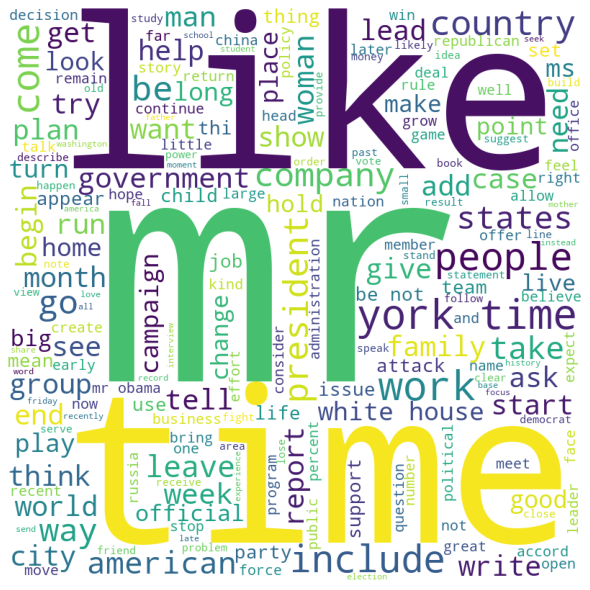

In [2]:

# Python program to generate WordCloud
  
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''

for tokens in articles.cleanseText[0:5000]:
  comment_words += " ".join(tokens)+" "

stopwords = ['know','donald','trump','call','new','say','hillary','clinton','do','united','state','the','day','news','that','have','however','year','there']
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [7]:
# use explode to expand the lists into separate rows
dfe =articles.cleanseText.explode().to_frame().reset_index(drop=True)

# groupby the values in the column, get the count and sort
dfg = dfe.groupby('cleanseText').cleanseText.count() \
                               .reset_index(name='count') \
                               .sort_values(['count'], ascending=False) \
                               .head(10).reset_index(drop=True)


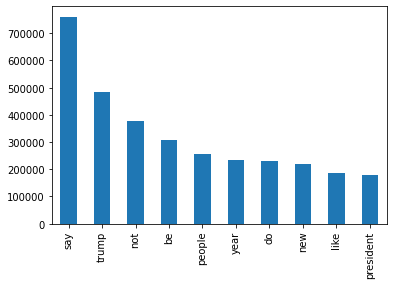

In [4]:
dfe.cleanseText.value_counts().head(10).plot.bar()

In [ ]:
import seaborn as sns

# plot dfe
sns.countplot(x='cleanseText', data=dfe, order=dfe.cleanseText.value_counts().iloc[:10].index)
plt.xticks(rotation=90)